In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load the data

When downloading our data, it did not come with headers. We fixed this by adding getting the ordered headers from directory we downloaded the data frame, and implemented then BY USING... From this group of files, we confirmed our theories that variable_name_SE was the standard error and variable_name_Worst was the largest value. Along with the leading diagonal of our pair plots of all the unique variables following a normal distributions, inline with the Central Limit Theorem, gave us confidence we have assigned the correct headers onto our dataframe.

Originally our data was in .name and .data file formats, which we could not access. We fixed this by converting the files into a .csv format. This gave us an error that we might lose information, however according to the data set summary we still have every instance of our data and every column, and it is to the same 4 significant figures-so we know no data has been lost.


In [3]:
df = pd.read_csv("./wdbc.csv")
df.head(10)

,ID,B/M,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Clean the data

Our data is supposedly clean, and observing the first few instances it does seem so. We already know that Pandas only allows one data type per column, so this is a non issue. We will look for duplicates in our data, as the probability of so many factors being identical is significantly low- if we have duplicates this may be a fault in the data collection or the previously mentioned .csv method of extracting the data. One issue that we cannot determine just from looking at the data, is the data type of our values, i.e a string for a float.

In [4]:
print(f"Same patient entered more than once: {df.duplicated().any()}")
df_dup = df.drop('ID', axis=1)
print(f"Same patient entered more than once under a different ID: {df_dup.duplicated().any()}") # testing with ID
print(f"Null values? {df.isnull().values.any()}")
print(f"There are {len(df)} instances, of which {df['ID'].nunique()} are unique \n")
df.info()


Same patient entered more than once: False
Same patient entered more than once under a different ID: False
Null values? False
There are 569 instances, of which 569 are unique 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     569 non-null    int64  
 1   B/M                    569 non-null    object 
 2   Radius                 569 non-null    float64
 3   Texture                569 non-null    float64
 4   Perimeter              569 non-null    float64
 5   Area                   569 non-null    float64
 6   Smoothness             569 non-null    float64
 7   Compactness            569 non-null    float64
 8   Concavity              569 non-null    float64
 9   ConcavePoints          569 non-null    float64
 10  Symmetry               569 non-null    float64
 11  FractalDimension       569 non-null  

We will next split our data in its label and features, and drop our ID column- as it bears no effect on our model (and as each instance value overall is unique, we could always reverse engineer our way back to get the ID). As seen above, our B/M column has an object type - this can cause issues with Seaborn plot so we will encode it 0 or 1,

In [5]:
encoder = LabelEncoder().fit(df["B/M"])
df['B/M'] = encoder.transform(df["B/M"])
label = df["B/M"] #One line here is redundant?
not_data = ["ID", "B/M"]
feature = df.drop(not_data, axis=1)
data = pd.concat([label, feature], axis=1)

We can also preemptively split our data into the train/test/validation sets, however these ratios be tuned at a later date depending on the number of features in our data and the specific algorithm. We used a stratified sample, as this is a classification problem with our labels being either Benign(0) or Malignant(1). We do not have to shuffle our dataframe, as train_test_split(shuffle=True).


In [6]:
x, x_test, y, y_test = train_test_split(feature, label, test_size=0.25, stratify=label)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, stratify=y)

### Data Visualization & Exploration

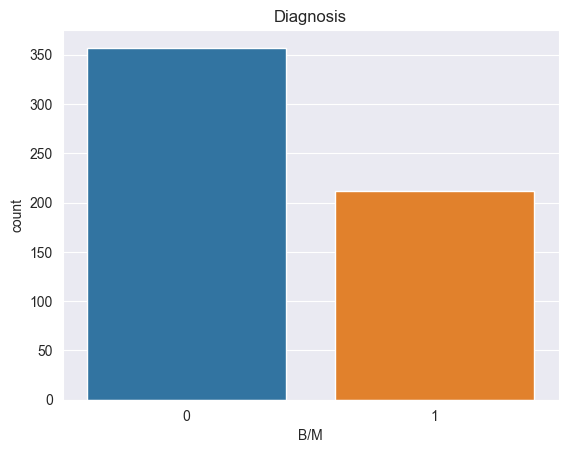

Percentage of Malignant Tumours is 0.373


In [7]:
sns.countplot(data=feature, x=label)
plt.title("Diagnosis")
plt.show()
# Make graphs nice
sum(label) # 1 mean malignant
len(label)
print(f"Percentage of Malignant Tumours is {round(sum(label) / len(label), 3)}")

The ratio of Benign is slightly higher than what we would expect (as ~80% of breast cancer on average is Benign), so our data is not too imbalanced. However, we may still decide to try penalized models as a) percentage of Malignant tumours is higher than normal (so we would penalize malignant) and b) the cost of false negatives is very high (as treatment will be delayed) so we may want to significantly penalize false negatives in our model.

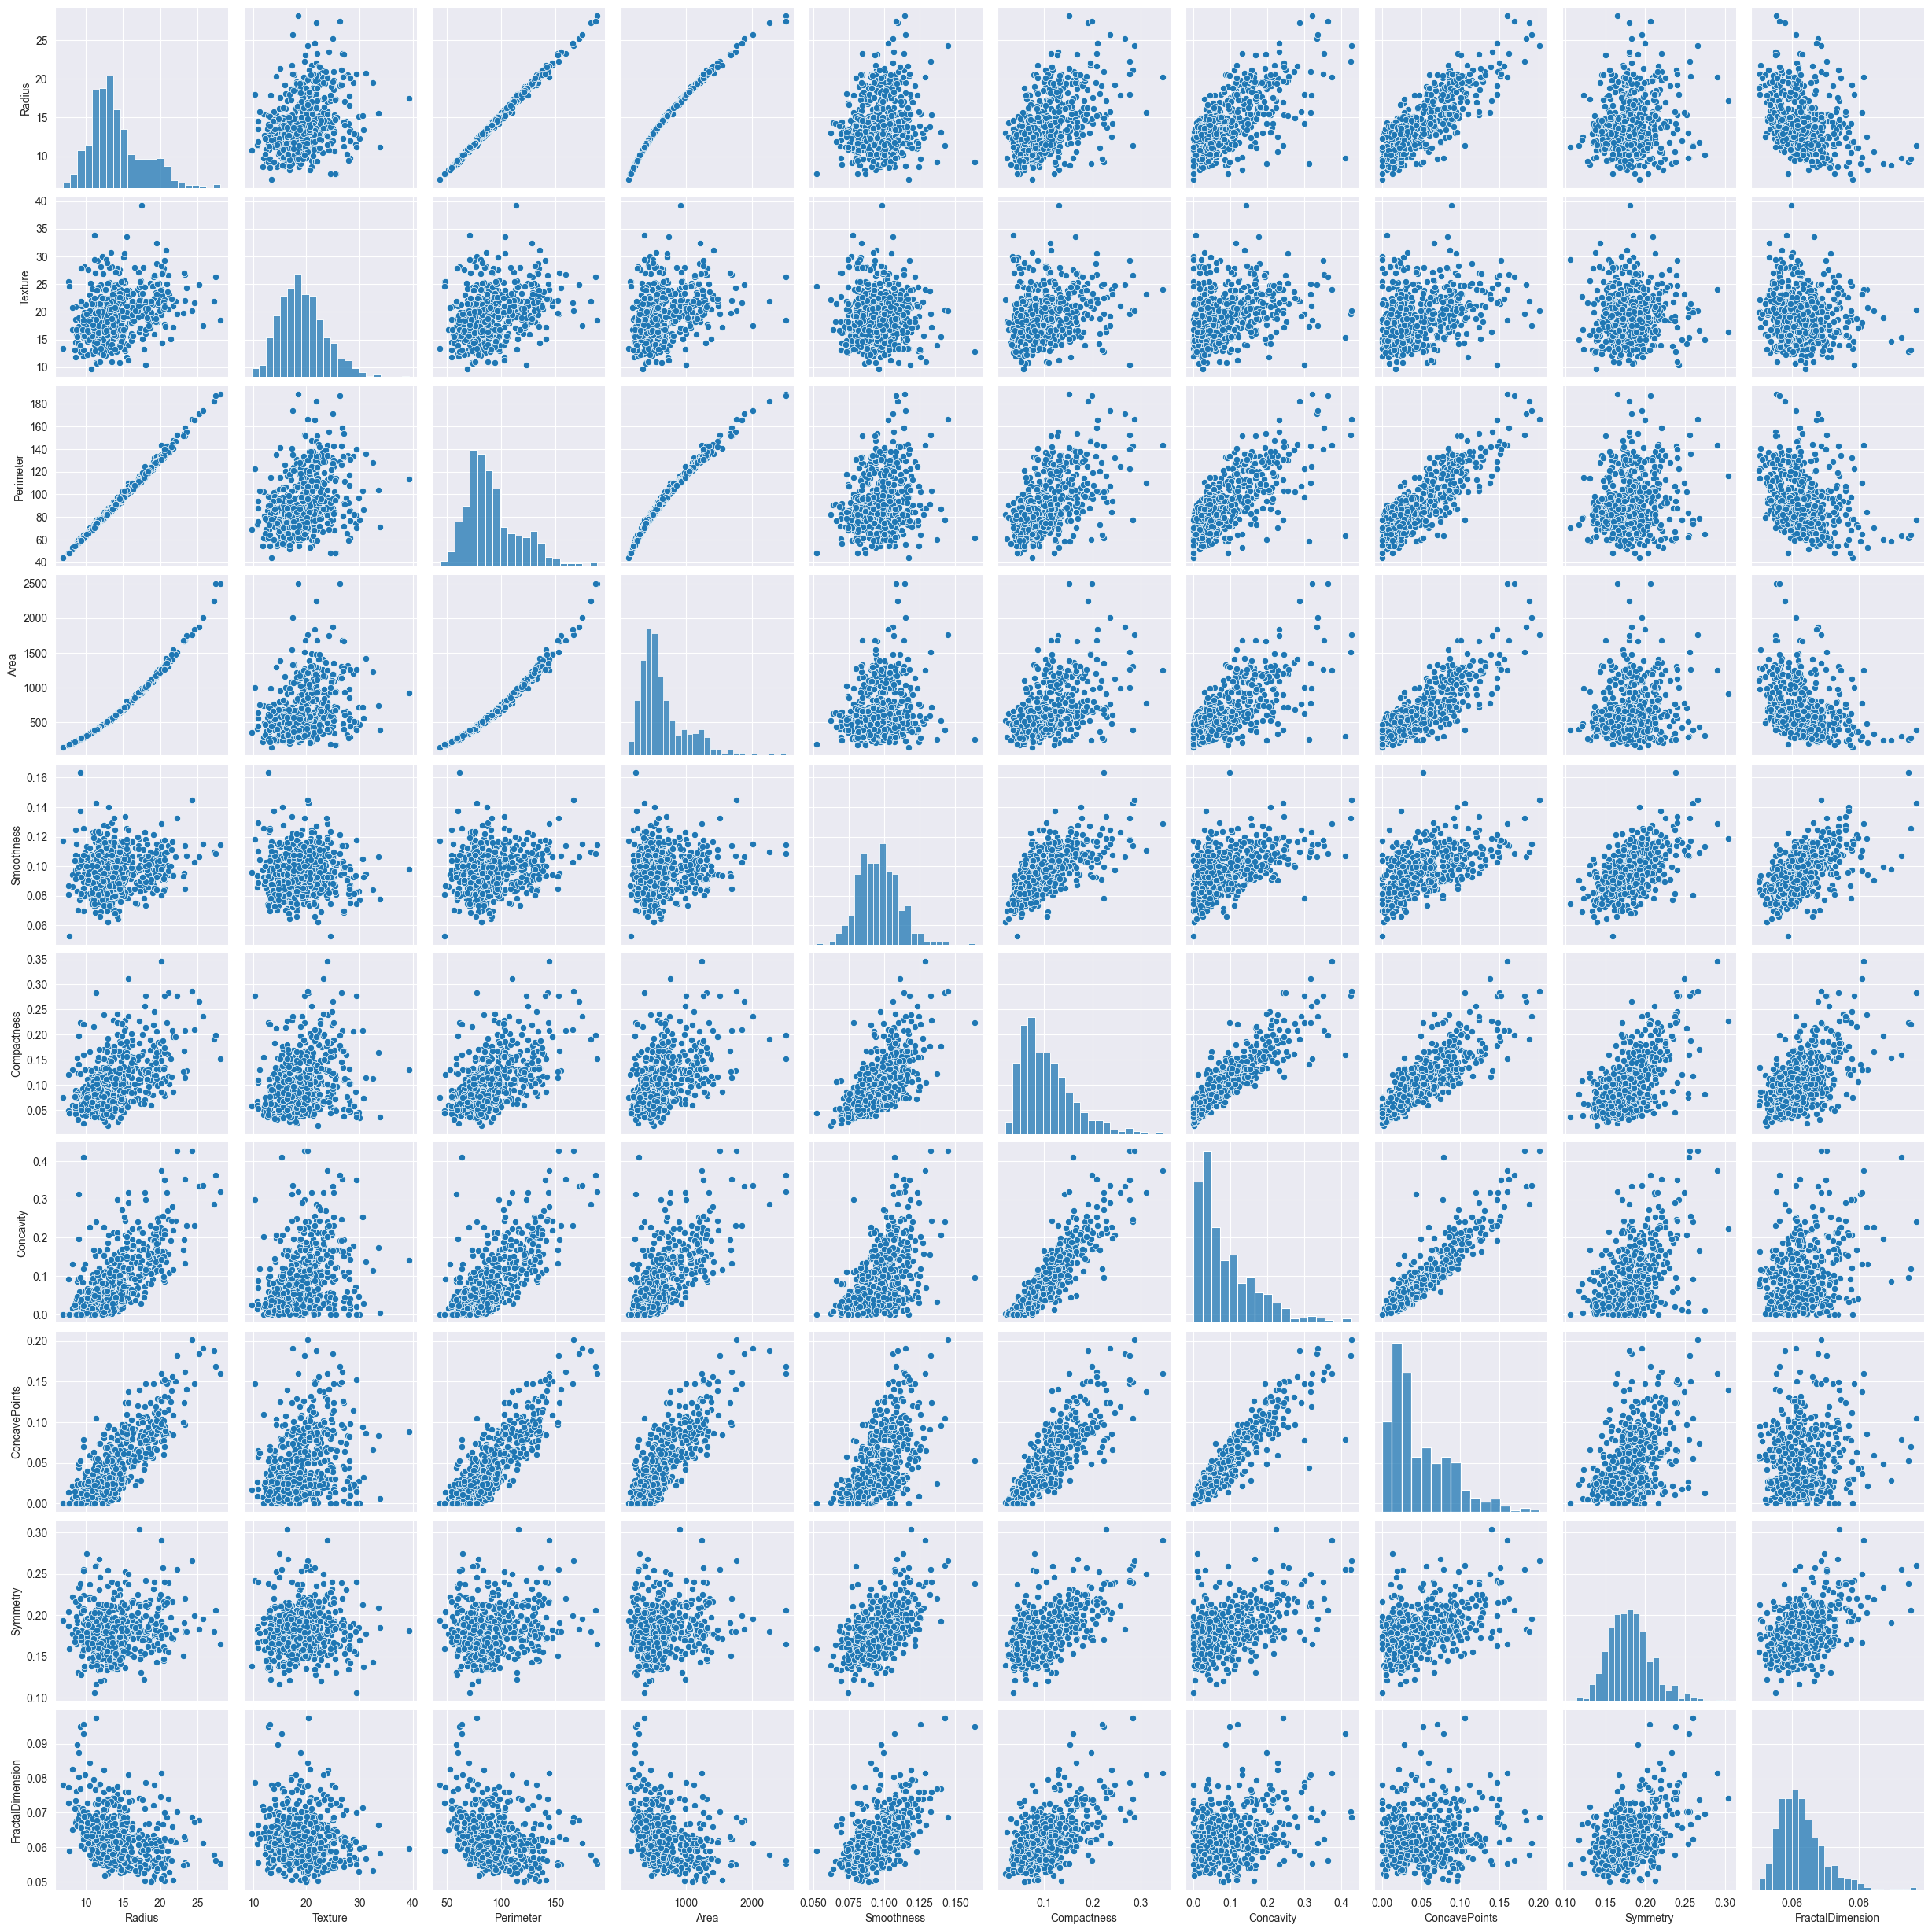

In [8]:
sns.pairplot(data=feature.iloc[::, :10])
plt.show()
# can't load for me, also how can I add hue to this ('B/M')

We can talk about the normality with CLT of leading diagonal (for each variable roughly normal, maybe concave stuff is exponential). Also talk about mathematical link of radius, perimeter and area or concavity and concave points (what even is that)???

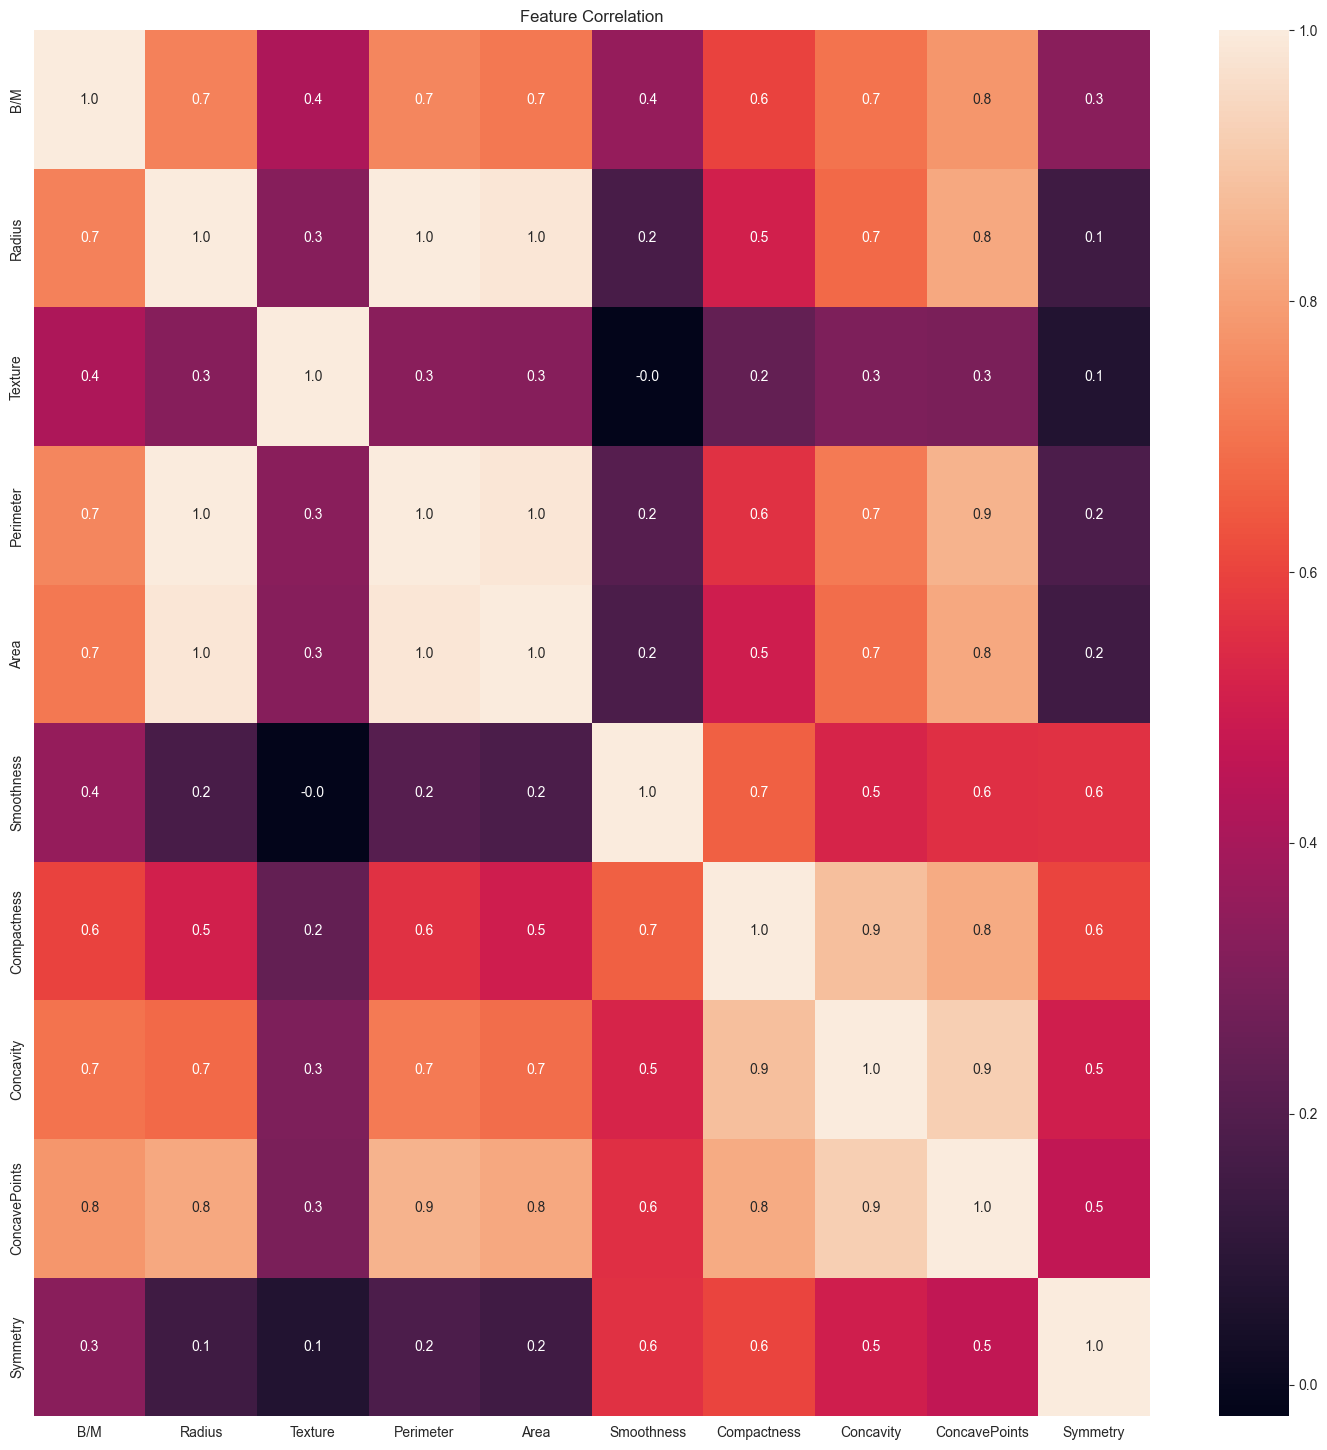

In [9]:
f, ax = plt.subplots(figsize=(18, 18))

sns.heatmap((data.iloc[::, :10]).corr(), annot=True, fmt=".1f", ax=ax)
plt.title("Feature Correlation")
plt.show()

Look at the correlations between B/M and other variables, such as symmetry is only 0.3 so should we remove this variable?

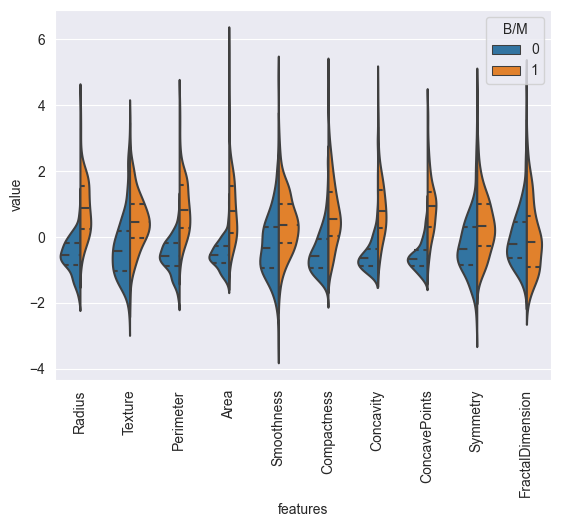

In [13]:
temp_y, temp_x = y, x  # so we don't alter original df
normal_data = (temp_x - temp_x.mean()) / (temp_x.std())  # must be standardized for multi var plot
data = pd.concat([y, normal_data.iloc[::, :10]], axis=1)  # index 0:10, 10:20, 20: # for usual, se, worst
data = pd.melt(data, id_vars="B/M", var_name="features", value_name='value')
sns.violinplot(x="features", y="value", hue="B/M", data=data, split=True, inner="quart")
plt.xticks(rotation=90)  # roate labels on variables
plt.show()

What Inference can we make from this? The y-axis is standardized so no real value, but ig distribution? for example for area we can see a very significant difference

In [14]:
B, M = y.value_counts()  # 0 or False is for having cancer
print("Benign:", B)
print("Malignant:", M)
x.describe()


Benign: 267
Malignant: 159


,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.015763,19.210587,91.250587,641.001643,0.096458,0.105237,0.088197,0.048699,0.181435,0.063007,...,16.089908,25.624038,106.055423,854.378404,0.132548,0.257512,0.276018,0.115155,0.290359,0.084606
std,3.355767,4.034496,23.140255,330.871986,0.013792,0.051070,0.074969,0.037048,0.027729,0.006894,...,4.584242,6.006686,31.836044,531.604609,0.022285,0.156044,0.207854,0.063398,0.061236,0.018226
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156600,0.057370
25%,11.742500,16.162500,75.325000,423.675000,0.086692,0.066715,0.031672,0.021105,0.161900,0.058237,...,13.020000,21.382500,84.122500,515.425000,0.116600,0.150925,0.121125,0.065720,0.251075,0.072080
50%,13.435000,18.905000,86.965000,555.900000,0.096035,0.095090,0.062650,0.034615,0.179550,0.061685,...,14.980000,25.305000,97.860000,688.100000,0.131250,0.216550,0.229000,0.101950,0.281350,0.080210
75%,15.707500,21.680000,103.100000,758.600000,0.104900,0.131300,0.126675,0.070403,0.196500,0.066530,...,18.227500,30.015000,123.500000,1028.750000,0.145525,0.339700,0.384700,0.159500,0.317475,0.092560
max,27.420000,33.560000,186.900000,2501.000000,0.163400,0.345400,0.426400,0.191300,0.304000,0.095750,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.577400,0.207500


General statistics description.